In [1]:
# write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
ws = pd.read_csv('Weekly-Sales.csv')
ws.head()

,Store,Date,Weekly_Sales
0,1,5/02/2010,24924.50
1,1,12/02/2010,46039.49
2,1,19/02/2010,41595.55
3,1,26/02/2010,19403.54
4,1,5/03/2010,21827.90


<AxesSubplot:xlabel='Store'>

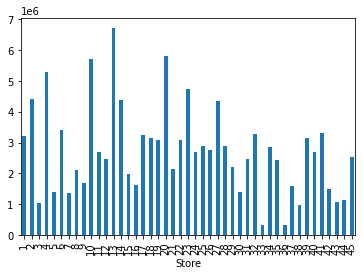

In [16]:
G = ws.groupby('Store')['Weekly_Sales'].sum()
G.plot.bar(x='Store', y='Weekly_Sales')

In [17]:
r = pd.read_csv('Region.csv')
r.head()

,Store,Region
0,1,A
1,2,A
2,3,A
3,4,A
4,5,A


In [18]:
sd =  pd.read_csv('StoreDetails.csv')    # this file have nan values in last column
sd['Unemployment'].fillna(sd['Unemployment'].mean(), inplace = True)
sd.head()

,Store,Date,Temperature,Unemployment
0,1,5/02/2010,42.31,8.106
1,1,12/02/2010,38.51,8.106
2,1,19/02/2010,39.93,8.106
3,1,26/02/2010,46.63,8.106
4,1,5/03/2010,46.50,8.106


In [19]:
df1 = pd.merge(r,sd, how='inner', on='Store')  # bydefault inner
df1.head()

,Store,Region,Date,Temperature,Unemployment
0,1,A,5/02/2010,42.31,8.106
1,1,A,12/02/2010,38.51,8.106
2,1,A,19/02/2010,39.93,8.106
3,1,A,26/02/2010,46.63,8.106
4,1,A,5/03/2010,46.50,8.106


In [20]:
df = pd.merge(df1,ws, on=['Store','Date'])  # bydefault inner
df.head()

,Store,Region,Date,Temperature,Unemployment,Weekly_Sales
0,1,A,5/02/2010,42.31,8.106,24924.50
1,1,A,12/02/2010,38.51,8.106,46039.49
2,1,A,19/02/2010,39.93,8.106,41595.55
3,1,A,26/02/2010,46.63,8.106,19403.54
4,1,A,5/03/2010,46.50,8.106,21827.90


In [21]:
df['year'] = df['Date'].apply(lambda x : x.split('/')[2])
df.head()

,Store,Region,Date,Temperature,Unemployment,Weekly_Sales,year
0,1,A,5/02/2010,42.31,8.106,24924.50,2010
1,1,A,12/02/2010,38.51,8.106,46039.49,2010
2,1,A,19/02/2010,39.93,8.106,41595.55,2010
3,1,A,26/02/2010,46.63,8.106,19403.54,2010
4,1,A,5/03/2010,46.50,8.106,21827.90,2010


<AxesSubplot:xlabel='year'>

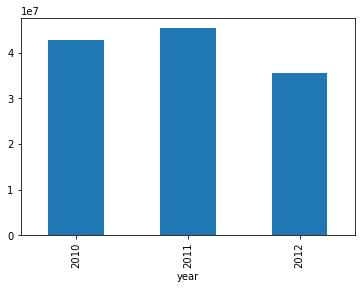

In [22]:
d1 = df.groupby('year')['Weekly_Sales'].sum()
d1.plot.bar(x='year', y='Weekly_Sales')

<AxesSubplot:xlabel='Store'>

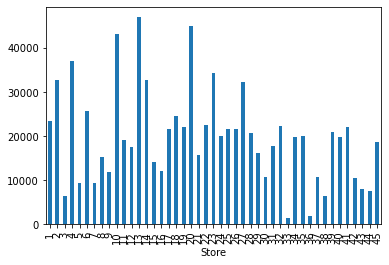

In [23]:
d2 = df[df['Date'].apply(lambda x : x.split('/')[2] == '2010')]
d21 = d2.groupby('Store')['Weekly_Sales'].mean()
d21.plot.bar(x='Store', y='Weekly_Sales')


<AxesSubplot:xlabel='Temperature'>

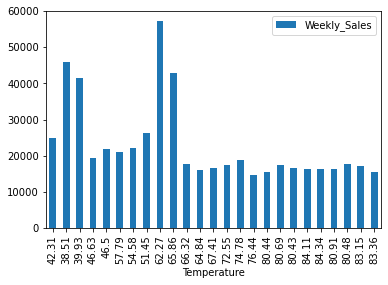

In [24]:
d3 = df
d3.head(25).plot.bar(x='Temperature', y='Weekly_Sales')

<AxesSubplot:xlabel='Unemployment'>

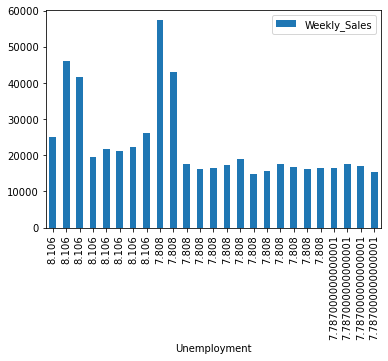

In [25]:
d3.head(25).plot.bar(x='Unemployment', y='Weekly_Sales')

<AxesSubplot:xlabel='Region'>

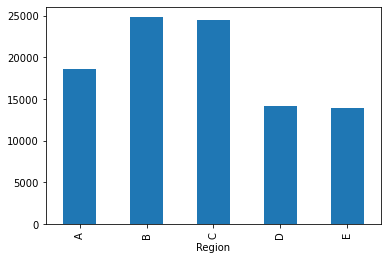

In [26]:
d4 = df.groupby('Region')['Weekly_Sales'].mean()
d4.plot.bar(x='Region', y='Weekly_Sales')